# K-Means desde Cero

Este cuaderno implementa el algoritmo K-Means desde cero utilizando únicamente NumPy. Incluye pasos para la inicialización de centroides, asignación de puntos y ajuste de los centroides.

## 1. Introducción al Algoritmo K-Means

K-Means es un algoritmo no supervisado que agrupa datos en `k` clusters. Funciona iterativamente para minimizar la suma de las distancias al centroide más cercano. Su procedimiento básico es:

1. Inicializar `k` centroides al azar.
2. Asignar cada punto al centroide más cercano.
3. Recalcular los centroides como el promedio de los puntos asignados.
4. Repetir hasta que los centroides no cambien significativamente.

## 2. Generación de Datos Simulados

Utilizaremos datos simulados para probar nuestro algoritmo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [17]:
# 1. Cargar el dataset Iris
def load_iris_dataset(file_path):
    data = np.genfromtxt(file_path, delimiter=',', dtype=str, skip_header=1)
    features = data[:, 1:-1].astype(float)  # Tomamos las columnas 1 a 4 como características
    classes = data[:, -1]  # La última columna contiene las clases
    return features, classes


### Carga de datos 

In [18]:
# Cargar datos
file_path = 'Iris.csv'  # Cambia esta ruta si el archivo está en otra ubicación
X, classes  = load_iris_dataset(file_path)



## 3. Implementación del Algoritmo K-Means

El algoritmo se implementará en las siguientes partes:
- Inicialización aleatoria de los centroides.
- Asignación de puntos al centroide más cercano.
- Actualización de los centroides.

### Inicialización de centroides

In [19]:
# Inicialización de centroides
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])[:k]
    return X[random_indices]

# Prueba de inicialización
k = 3 #cantidad de clases 
centroids = initialize_centroids(X, k)
print('Centroides iniciales:', centroids)

Centroides iniciales: [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]]


### Asignación de puntos al centroide más cercano

In [ ]:

def assign_clusters(X, centroids):
    distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)

# Prueba de asignación
labels = assign_clusters(X, centroids)
print('Etiquetas asignadas:', labels[:10])

Etiquetas asignadas: [1 1 1 1 1 1 1 1 1 1]


### Reajuste de centroides

In [ ]:

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Prueba de reajuste
new_centroids = update_centroids(X, labels, k)
print('Centroides actualizados:', new_centroids)

Centroides actualizados: [[6.06904762 2.81785714 4.66309524 1.58809524]
 [5.006      3.418      1.464      0.244     ]
 [7.275      3.15625    6.18125    2.1375    ]]


### Bucle completo de K-Means

In [ ]:

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels

# Ejecutar K-Means
final_centroids, final_labels = kmeans(X, k)
print('Centroides finales:', final_centroids)

Centroides finales: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## 4. Visualización de los Resultados

Finalmente, visualizamos los clusters formados por el algoritmo.

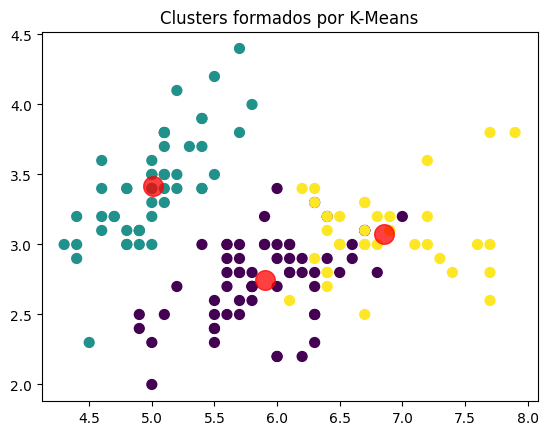

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=final_labels, s=50, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters formados por K-Means')
plt.show()

In [26]:
def plot_clusters_with_classes(X, labels, centroids, classes):
    # Crear un mapeo de colores para las clases reales
    unique_classes = np.unique(classes)
    class_colors = {cls: idx for idx, cls in enumerate(unique_classes)}
    true_colors = np.array([class_colors[cls] for cls in classes])

    # Crear la figura
    plt.figure(figsize=(10, 6))

    # Graficar cada clase con colores específicos
    for cls in unique_classes:
        cls_indices = classes == cls
        plt.scatter(X[cls_indices, 0], X[cls_indices, 1],
                    label=f'Clase: {cls}', s=50, alpha=0.7)

    # Graficar los clusters formados por K-Means
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool', s=20, alpha=0.4, label='Clusters K-Means')

    # Graficar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.9, label='Centroides')

    # Añadir título y leyenda
    plt.title('Clusters K-Means con Clases Reales')
    plt.legend(loc='best')
    plt.show()


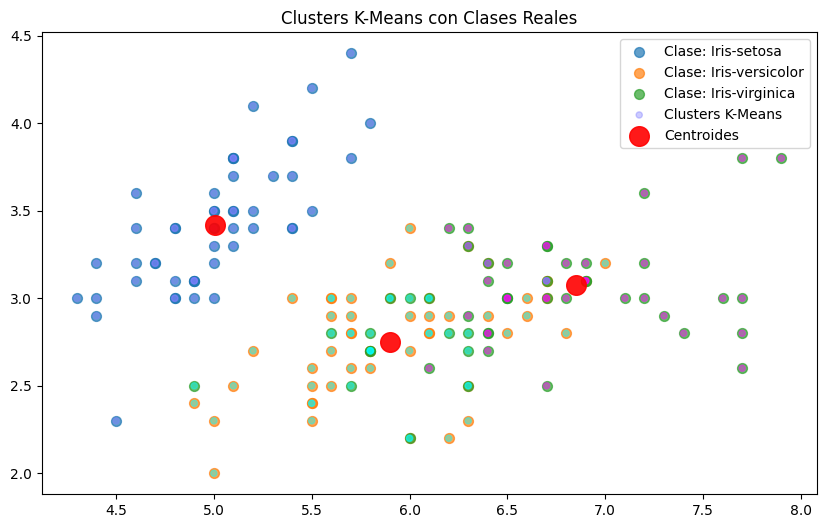

In [27]:
plot_clusters_with_classes(X, final_labels, final_centroids, classes)